In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import tf_keras

In [15]:
# ------ DATA GENERATION ------

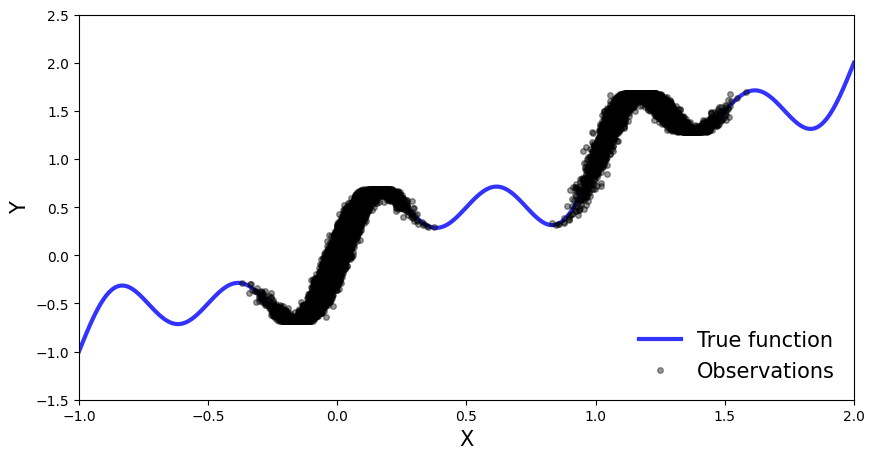

In [3]:
np.random.seed(42+1)

X_train = np.hstack([0.1 * np.random.randn(10000), 0.6 + 0.2 * np.random.randn(0), 1.2 + 0.1 * np.random.randn(10000)])
noise = 0.02 * np.random.randn(X_train.shape[0])
y_train = X_train + 0.3 * np.sin(2 * np.pi * (X_train + noise)) + 0.3 * np.sin(4 * np.pi * (X_train + noise)) + noise

x_true = np.linspace(-1, 2, 1000)
y_true = x_true + 0.3 * np.sin(2 * np.pi * x_true) + 0.3 * np.sin(4 * np.pi * x_true)

xlims = [-1, 2]
ylims = [-1.5, 2.5]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_true, y_true, 'b-', linewidth=3, label="True function", alpha=0.8)
ax.plot(X_train,y_train, 'ko', markersize=4, label="Observations", alpha=0.4)
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=15)
ax.legend(loc=4, fontsize=15, frameon=False)

plt.show()

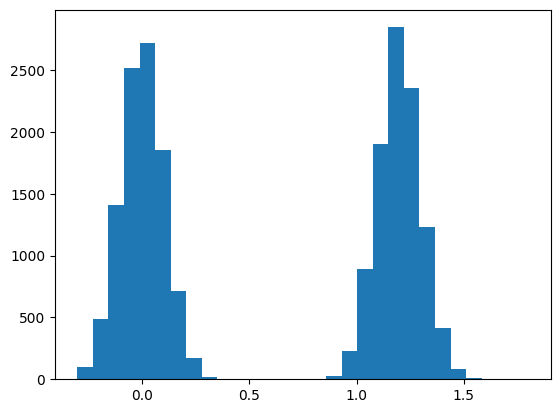

In [4]:
plt.hist(X_train, bins=np.linspace(-0.3, 1.8, 30))
plt.show()

In [5]:
# ------ NON-BAYESIAN SINGLE OUTPUT ------

In [6]:
model = tf_keras.Sequential([
    tf_keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(1)
])

model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=0.001), loss="MSE")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               256       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33409 (130.50 KB)
Trainable params: 33409 (130.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
x_test = np.linspace(-0.5, 1.5, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)

history = model.fit(X_train,y_train, validation_data=(x_test, y_test), epochs=40, verbose=1)

Epoch 1/40
625/625 [==============================] - 0s 354us/step - loss: 0.0430 - val_loss: 0.1282
Epoch 2/40
625/625 [==============================] - 0s 268us/step - loss: 0.0258 - val_loss: 0.1381
Epoch 3/40
625/625 [==============================] - 0s 283us/step - loss: 0.0175 - val_loss: 0.0937
Epoch 4/40
625/625 [==============================] - 0s 264us/step - loss: 0.0100 - val_loss: 0.0268
Epoch 5/40
625/625 [==============================] - 0s 280us/step - loss: 0.0077 - val_loss: 0.0150
Epoch 6/40
625/625 [==============================] - 0s 271us/step - loss: 0.0081 - val_loss: 0.0197
Epoch 7/40
625/625 [==============================] - 0s 273us/step - loss: 0.0077 - val_loss: 0.0180
Epoch 8/40
625/625 [==============================] - 0s 266us/step - loss: 0.0077 - val_loss: 0.0180
Epoch 9/40
625/625 [==============================] - 0s 266us/step - loss: 0.0074 - val_loss: 0.0188
Epoch 10/40
625/625 [==============================] - 0s 270us/step - loss: 0.007

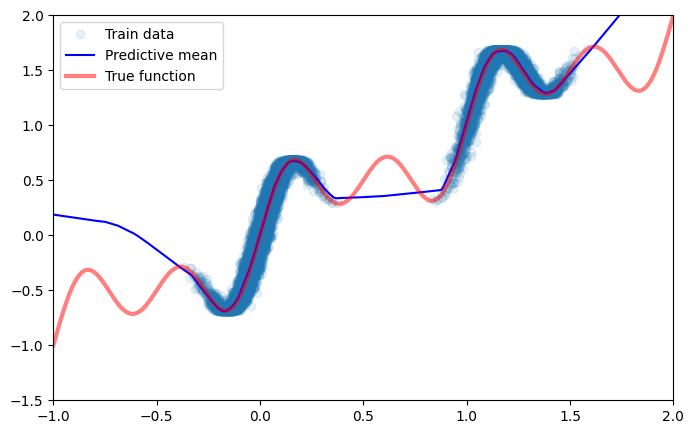

In [8]:
x_test = np.linspace(-1, 2, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)
y_pred = model(x_test)


import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(X_train, y_train, 'o', label='Train data', alpha=0.1)
plt.plot(x_test, y_pred, 'b', label='Predictive mean')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.5)
plt.ylim(-1.5,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

In [23]:
# ------ NON-BAYESIAN GAUSSIAN MIXTURE ------

In [9]:
event_shape = [1]
params_size = tfp.layers.MixtureNormal.params_size(2, event_shape)

model = tf_keras.Sequential([
    tf_keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(params_size),
    tfp.layers.MixtureNormal(2, event_shape)
])

def negloglik(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=0.001), loss=negloglik)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               256       
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                                 
 mixture_normal (MixtureNor  ((None, 1),               0         
 mal)                         (None, 1))                         
                                                                 
Total params: 34054 (133.02 KB)
Trainable params: 34054 (133.02 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [10]:
x_test = np.linspace(-0.5, 1.5, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)

history = model.fit(X_train,y_train, validation_data=(x_test, y_test), epochs=40, verbose=1)

Epoch 1/40
625/625 [==============================] - 1s 527us/step - loss: -0.4260 - val_loss: 0.9844
Epoch 2/40
625/625 [==============================] - 0s 308us/step - loss: -0.6045 - val_loss: 0.7759
Epoch 3/40
625/625 [==============================] - 0s 303us/step - loss: -0.6517 - val_loss: 1.0289
Epoch 4/40
625/625 [==============================] - 0s 314us/step - loss: -0.7115 - val_loss: 1.5300
Epoch 5/40
625/625 [==============================] - 0s 309us/step - loss: -0.8333 - val_loss: 0.2422
Epoch 6/40
625/625 [==============================] - 0s 306us/step - loss: -1.0368 - val_loss: -0.0653
Epoch 7/40
625/625 [==============================] - 0s 315us/step - loss: -1.1281 - val_loss: -0.3095
Epoch 8/40
625/625 [==============================] - 0s 306us/step - loss: -1.1964 - val_loss: -0.6158
Epoch 9/40
625/625 [==============================] - 0s 310us/step - loss: -1.2359 - val_loss: -0.9133
Epoch 10/40
625/625 [==============================] - 0s 312us/step 

2025-08-26 09:29:58.854780: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


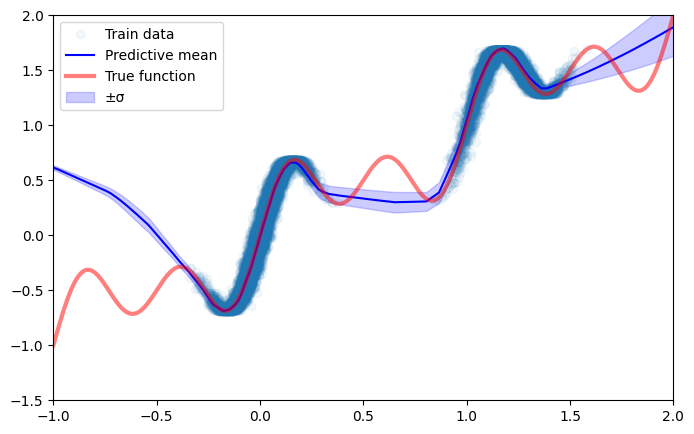

In [11]:
x_test = np.linspace(-1, 2, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)
y_dist = model(x_test)
y_pred = y_dist.mean().numpy()
y_std = y_dist.stddev().numpy()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(X_train, y_train, 'o', label='Train data', alpha=0.05)
plt.plot(x_test, y_pred, 'b', label='Predictive mean')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.5)
plt.fill_between(x_test.flatten(),
                 (y_pred - y_std).reshape(-1),
                 (y_pred + y_std).reshape(-1),
                 color='blue', alpha=0.2, label='±σ')
plt.ylim(-1.5,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

In [29]:
# ------ BAYESIAN SINGLE OUTPUT ------

In [117]:
tfd = tfp.distributions
tfpl = tfp.layers

batch_num = int(X_train.shape[0] / 128)

scale = X_train.shape[0]

norm_layer = tf_keras.layers.Normalization(input_shape=(1,))
norm_layer.adapt(X_train.reshape(-1,1))

activation = "relu"
model = tf_keras.Sequential([
    norm_layer,
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tf_keras.layers.Dense(1)
])


boundaries = [50 * batch_num]
values = [0.001, 0.0001]
learning_schedule = tf_keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=learning_schedule), loss="MSE")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_flipout_6 (DenseFlip  (None, 128)               384       
 out)                                                            
                                                                 
 dense_flipout_7 (DenseFlip  (None, 128)               32896     
 out)                                                            
                                                                 
 dense_flipout_8 (DenseFlip  (None, 128)               32896     
 out)                                                            
                                                                 
 dense_10 (Dense)            (None, 1)                

/home/kdrabicki/anaconda3/envs/cpu_env/lib/python3.12/site-packages/tensorflow_probability/python/layers/util.py:99: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/home/kdrabicki/anaconda3/envs/cpu_env/lib/python3.12/site-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/home/kdrabicki/anaconda3/envs/cpu_env/lib/python3.12/site-packages/tensorflow_probability/python/layers/util.py:109: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_vari

In [118]:
x_test = np.linspace(-0.5, 1.5, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)


loss_log_dir = "../logs/fit/loss/BNN"
history = model.fit(X_train,y_train, validation_data=(x_test, y_test), epochs=1000, verbose=1, batch_size=128,
                    callbacks=[tf_keras.callbacks.TensorBoard(log_dir=loss_log_dir, histogram_freq=1), tf_keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                                                                                        mode='min',
                                                                                                                                        patience=30,
                                                                                                                                        verbose=1,
                                                                                                                                        start_from_epoch=100,
                                                                                                                                        restore_best_weights=True)])

Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 4.1459 - val_loss: 4.2048
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.8639 - val_loss: 3.9304
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.6322 - val_loss: 3.7142
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.4015 - val_loss: 3.4407
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.1732 - val_loss: 3.2172
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.9485 - val_loss: 2.9878
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.7277 - val_loss: 2.7625
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.5109 - val_loss: 2.5560
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.2991 - val_loss: 2.3280
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.093

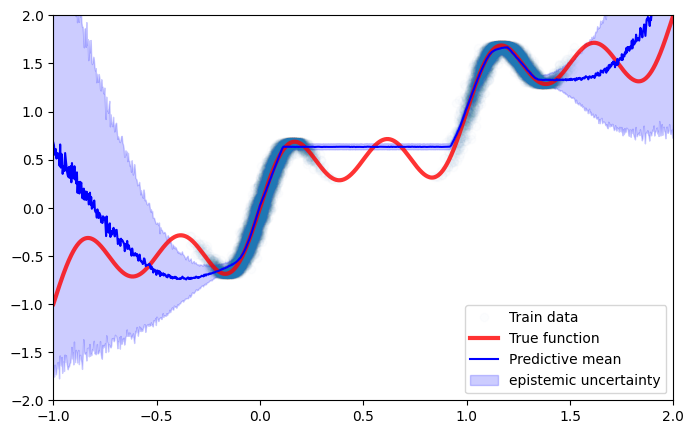

In [121]:
x_test = np.linspace(-1, 2, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)

means = []
for _ in range(1000):
    means.append(model(x_test))

y_mean = np.array(means).mean(axis=0)
y_epistemic_variance = np.array(means).std(axis=0) ** 2
y_std = np.sqrt(y_epistemic_variance)


import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(X_train, y_train, 'o', label='Train data', alpha=0.01)
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.8)
plt.plot(x_test, y_mean, color='b', label='Predictive mean')
plt.fill_between(x_test.flatten(),
                 (y_mean - 1 * y_std).reshape(-1),
                 (y_mean + 1 * y_std).reshape(-1),
                 color='blue', alpha=0.2, label='epistemic uncertainty')
plt.ylim(-2,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

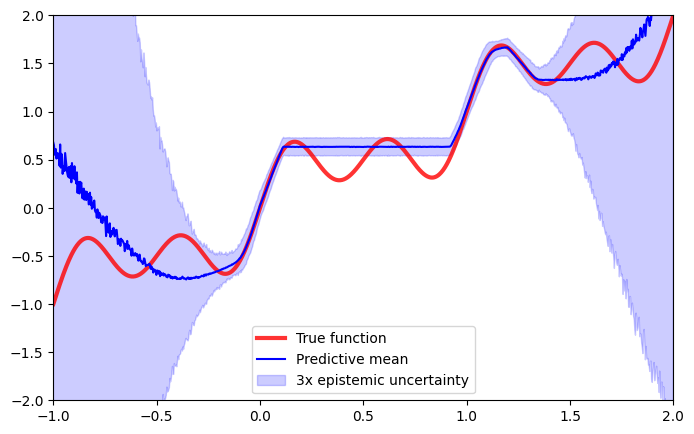

In [123]:
plt.figure(figsize=(8,5))
# plt.plot(X_train, y_train, 'o', label='Train data', alpha=0.01)
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.8)
plt.plot(x_test, y_mean, color='b', label='Predictive mean')
plt.fill_between(x_test.flatten(),
                 (y_mean - 3 * y_std).reshape(-1),
                 (y_mean + 3 * y_std).reshape(-1),
                 color='blue', alpha=0.2, label='3x epistemic uncertainty')
plt.ylim(-2,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

In [6]:
# ------ BAYESIAN GAUSSIAN MIXTURE ------

In [125]:
tfd = tfp.distributions
tfpl = tfp.layers

batch_num = int(X_train.shape[0] / 128)

scale = X_train.shape[0]


event_shape = [1]
params_size = tfp.layers.MixtureNormal.params_size(2, event_shape)

norm_layer = tf_keras.layers.Normalization(input_shape=(1,))
norm_layer.adapt(X_train.reshape(-1,1))

activation = "relu"
model = tf_keras.Sequential([
    norm_layer,
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tfpl.DenseFlipout(128, activation=activation,
                      kernel_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale,
                      bias_divergence_fn=lambda q,p,ignore: tfp.distributions.kl_divergence(q, p) / scale),
    tf_keras.layers.Dense(params_size),
    tfp.layers.MixtureNormal(2, event_shape)
])

def negloglik(y_true, y_pred):
    return -y_pred.log_prob(y_true)



boundaries = [150 * batch_num]
values = [0.001, 0.0001]
learning_schedule = tf_keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=learning_schedule), loss=negloglik)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_flipout_9 (DenseFlip  (None, 128)               384       
 out)                                                            
                                                                 
 dense_flipout_10 (DenseFli  (None, 128)               32896     
 pout)                                                           
                                                                 
 dense_flipout_11 (DenseFli  (None, 128)               32896     
 pout)                                                           
                                                                 
 dense_11 (Dense)            (None, 6)                

In [126]:
x_test = np.linspace(-0.5, 1.5, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)


loss_log_dir = "../logs/fit/loss/BNN"
history = model.fit(X_train,y_train, validation_data=(x_test, y_test), epochs=1000, verbose=1, batch_size=128,
                    callbacks=[tf_keras.callbacks.TensorBoard(log_dir=loss_log_dir, histogram_freq=1), tf_keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                                                                                        mode='min',
                                                                                                                                        patience=30,
                                                                                                                                        verbose=1,
                                                                                                                                        start_from_epoch=100,
                                                                                                                                        restore_best_weights=True)])

Epoch 1/1000


/home/kdrabicki/anaconda3/envs/cpu_env/lib/python3.12/site-packages/tf_keras/src/saving/serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         lambda t: MixtureNormal.new(  # pylint: disable=g-long-lambda
            t, num_components, event_shape, validate_args),

  config_arr = [serialize_keras_object(x) for x in obj]


157/157 [==============================] - 2s 3ms/step - loss: 4.1795 - val_loss: 5.8908
Epoch 2/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.6685 - val_loss: 5.1298
Epoch 3/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.4570 - val_loss: 4.7622
Epoch 4/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.2439 - val_loss: 4.9213
Epoch 5/1000
157/157 [==============================] - 0s 1ms/step - loss: 3.0381 - val_loss: 4.3039
Epoch 6/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.8450 - val_loss: 4.1947
Epoch 7/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.6361 - val_loss: 3.4106
Epoch 8/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.4555 - val_loss: 3.4593
Epoch 9/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.2975 - val_loss: 3.2343
Epoch 10/1000
157/157 [==============================] - 0s 1ms/step - loss: 2.1289 - val_loss:

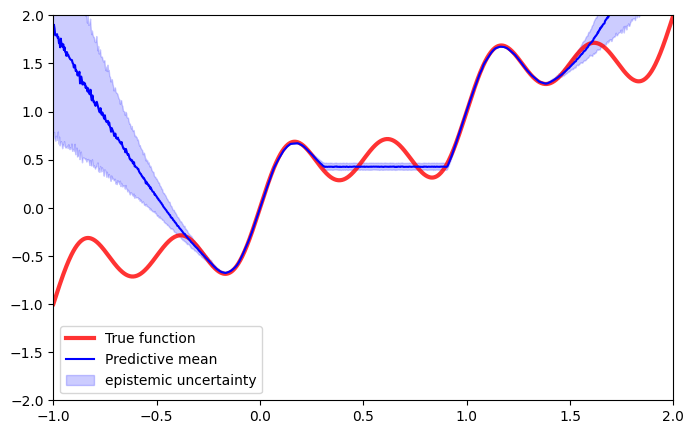

In [127]:
x_test = np.linspace(-1, 2, 1000)
y_test = x_test + 0.3 * np.sin(2 * np.pi * x_test) + 0.3 * np.sin(4 * np.pi * x_test)

means = []
variances = []
for _ in range(1000):
    dist = model(x_test)
    means.append(dist.mean().numpy())
    variances.append(dist.variance().numpy())

y_mean = np.array(means).mean(axis=0)
y_aleatoric_variance = np.array(variances).mean(axis=0)
y_epistemic_variance = np.array(means).std(axis=0) ** 2
y_std = np.sqrt(y_epistemic_variance)


import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
# plt.plot(X_train, y_train, 'kx', label='Train data')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.8)
plt.plot(x_test, y_mean, color='b', label='Predictive mean')
plt.fill_between(x_test.flatten(),
                 (y_mean - 1 * y_std).reshape(-1),
                 (y_mean + 1 * y_std).reshape(-1),
                 color='blue', alpha=0.2, label='epistemic uncertainty')
plt.ylim(-2,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

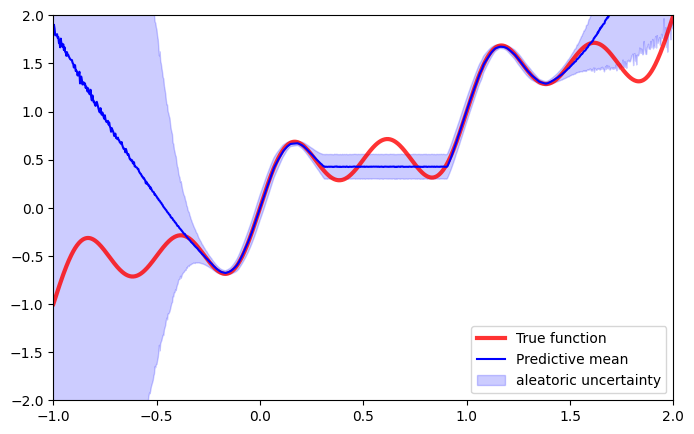

In [128]:
y_std = np.sqrt(y_aleatoric_variance)

plt.figure(figsize=(8,5))
# plt.plot(X_train, y_train, 'kx', label='Train data')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.8)
plt.plot(x_test, y_mean, color='b', label='Predictive mean')
plt.fill_between(x_test.flatten(),
                 (y_mean - 1 * y_std).reshape(-1),
                 (y_mean + 1 * y_std).reshape(-1),
                 color='blue', alpha=0.2, label='aleatoric uncertainty')
plt.ylim(-2,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

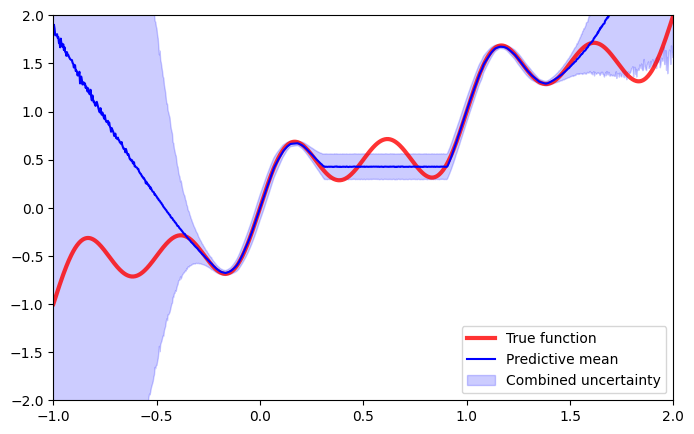

In [129]:
y_std = np.sqrt(y_epistemic_variance + 1.0 * y_aleatoric_variance)
plt.figure(figsize=(8,5))
# plt.plot(X_train, y_train, 'kx', label='Train data')
plt.plot(x_test, y_test, 'r', linewidth=3, label="True function", alpha=0.8)
plt.plot(x_test, y_mean, color='b', label='Predictive mean')
plt.fill_between(x_test.flatten(),
                 (y_mean - 1 * y_std).reshape(-1),
                 (y_mean + 1 * y_std).reshape(-1),
                 color='blue', alpha=0.2, label='Combined uncertainty')
plt.ylim(-2,2)
plt.xlim(-1, 2)
plt.legend()
plt.show()

In [132]:
# ------ UNCERTAINTY CALCULATION METHOD COMPARISON ------

In [131]:
num_mc_samples = 1000
num_y_samples  = 1000

all_y_samples = []

for i in range(num_mc_samples):
    pred_dist = model(x_test)
    y_samples = pred_dist.sample(num_y_samples)
    all_y_samples.append(y_samples)   

all_y_samples = tf.stack(all_y_samples, axis=0)
predictive_mean = tf.reduce_mean(all_y_samples, axis=[0,1])   # [batch, output_dim]
predictive_var  = tf.math.reduce_variance(all_y_samples, axis=[0,1])  # [batch, output_dim]
mc_std  = tf.sqrt(predictive_var)

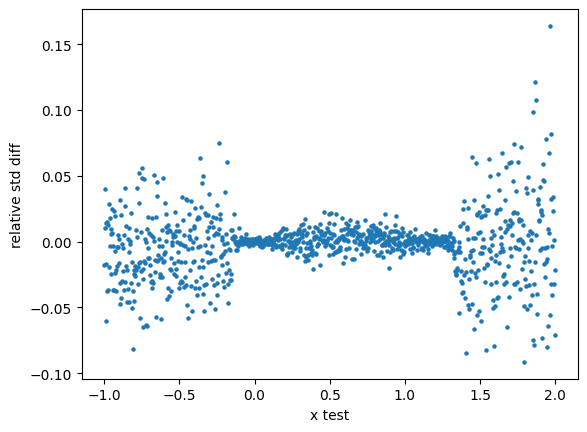

In [139]:
plt.scatter(x_test, (y_std - mc_std.numpy()) / mc_std.numpy(), s=5)
plt.xlabel("x test")
plt.ylabel("relative std diff")
plt.show()

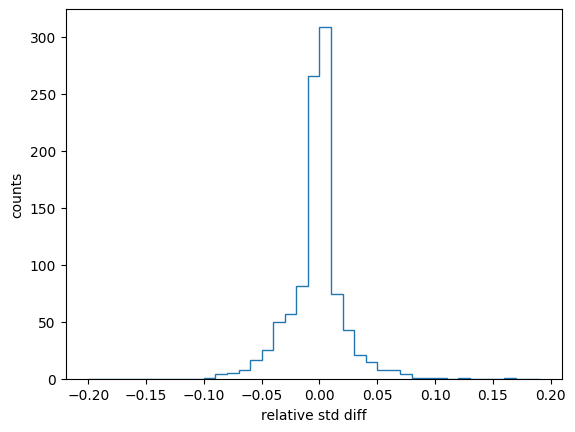

In [136]:
plt.hist((y_std - mc_std.numpy()) / mc_std.numpy(), bins=np.arange(-0.2, 0.20, 0.01), histtype="step")
plt.xlabel("relative std diff")
plt.ylabel("counts")
plt.savefig("rel_std_diff_hist.png")
plt.show()

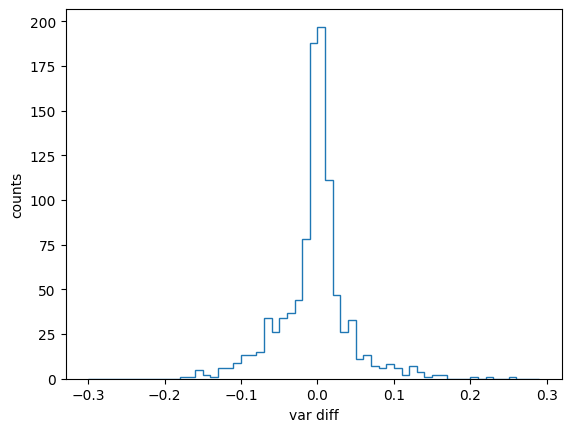

In [137]:
plt.hist((y_std**2 - predictive_var.numpy()) / predictive_var.numpy(), bins=np.arange(-0.3, 0.3, 0.01), histtype="step")
plt.xlabel("var diff")
plt.ylabel("counts")
plt.show()

True value: 0.5043314712690723
Analytical std: 0.10468228906393051
MC std: 0.10804327577352524


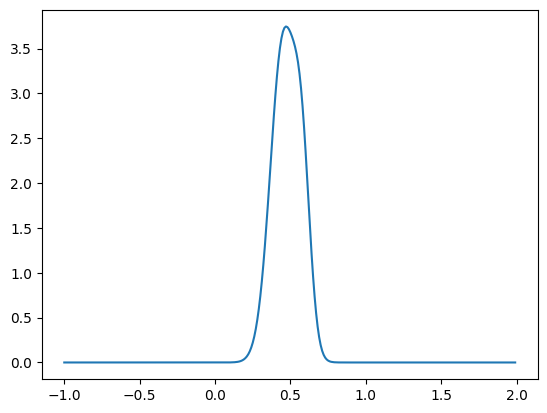

In [115]:
n = 500
print("True value:",y_test[n:n+1].item())
print("Analytical std:", y_std[n:n+1].item())
print("MC std:", mc_std[n:n+1].numpy().item())
dist = model(x_test[n:n+1])
points = np.arange(-1,2,0.01)

log_probs = []
for point in points:
    log_probs.append(dist.log_prob(point))

log_probs = np.exp(np.array(log_probs))
plt.plot(points, log_probs)
plt.show()

In [26]:
## ---- REDSHIFT DATA ----

In [27]:
# import importlib

# import data_frame
# import models

In [28]:
# importlib.reload(data_frame)
# importlib.reload(models)

# filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
# df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

# config = {}
# model = models.MLModelContext(strategy=models.BayesianNN(df, config))

In [29]:
# model.train()

In [30]:
# scaler = model.strategy.scaler
# X_test, y_test = df.get_random_test_dataset()
# X_faint, y_faint = df.get_faint_test_dataset()
# X_test = scaler.transform(X_test)
# X_faint = scaler.transform(X_faint)

In [31]:
# sample = 4
# probs = []
# means = []
# variances = []
# for _ in range(8):
#     dist = model.strategy.network(X_faint[sample:sample+1])
#     points = np.arange(0,5,0.01)
#     log_prob = [dist.log_prob(point) for point in points]
#     log_prob = np.array(log_prob)
#     prob = np.exp(log_prob)
#     probs.append(prob)
#     means.append(dist.mean())
#     variances.append(dist.variance())

# probs = np.array(probs).mean(axis=0)
# mean = np.array(means).mean(axis=0)

# plt.plot(points, probs)
# plt.vlines(x=y_faint[sample:sample+1], ymin=0, ymax=probs.max() + 0.1, color="r", linestyles="dashed", label="true")
# plt.vlines(x=mean, ymin=0, ymax=probs.max() + 0.1, color="orange", linestyles="dashed", label="pred")
# plt.legend()
# plt.show()

# print(f"Epistemic error: {np.array(means).std(axis=0).item():.2f}")
# print(f"Aleatoric error: {np.sqrt(np.array(variances).mean(axis=0).item()):.2f}")